In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df = pd.read_csv('salary_data_cleaned.csv')

In [5]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,average salary,company_text,job_state,same_state,company_age,python,r_studio,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research,NM,0,50,yes,no,no,no,yes
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System,MD,0,39,yes,no,no,no,no
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4,FL,1,13,yes,no,yes,no,yes
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL,WA,1,58,yes,no,no,no,no
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions,NY,1,25,yes,no,no,no,yes


In [6]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average salary', 'company_text',
       'job_state', 'same_state', 'company_age', 'python', 'r_studio', 'spark',
       'aws', 'excel'],
      dtype='object')

In [7]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior'in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    if 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else: 
        return 'na'
    
df['job_simplifier'] = df['Job Title'].apply(title_simplifier)
df['seniority'] = df['Job Title'].apply(seniority)  

In [8]:
print(df.job_simplifier.value_counts()) 
print(df.seniority.value_counts())

data scientist      279
na                  184
data engineer       119
analyst             102
manager              22
machine learning     22
director             14
Name: job_simplifier, dtype: int64
na        520
senior    220
jr          2
Name: seniority, dtype: int64


In [9]:
#fixing los angeles 


df['job_state'] = df['job_state'].apply(lambda x: 'CA' if x.strip() == 'Los Angeles' else x.strip())
print(df.job_state.value_counts())

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64


In [10]:
# job description length 

df['desc_length'] = df['Job Description'].apply(lambda x: len(x))
df['desc_length']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_length, Length: 742, dtype: int64

In [11]:
#competitor count 

df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['num_comp']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [12]:
#approx hourly wage to annual 

df['annual_wage'] = df['average salary'].apply(lambda x: x*2000)
df.annual_wage

0      144000.0
1      175000.0
2      170000.0
3      153000.0
4      229000.0
         ...   
737    169000.0
738    205000.0
739    147000.0
740    255000.0
741    187000.0
Name: annual_wage, Length: 742, dtype: float64

In [13]:
df.describe()

,Rating,Founded,min_salary,max_salary,average salary,same_state,company_age,desc_length,num_comp,annual_wage
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,74.068733,127.183288,100.626011,0.557951,49.389488,3869.545822,1.053908,201252.021563
std,0.801210,497.183763,31.869282,46.909006,38.855948,0.496965,53.962906,1521.495868,1.384239,77711.896313
min,-1.000000,-1.000000,10.000000,16.000000,13.500000,0.000000,-1.000000,407.000000,0.000000,27000.000000
25%,3.300000,1939.000000,52.000000,96.000000,73.500000,0.000000,14.000000,2801.000000,0.000000,147000.000000
50%,3.700000,1988.000000,69.500000,124.000000,97.500000,1.000000,27.000000,3731.000000,0.000000,195000.000000
75%,4.000000,2007.000000,91.000000,155.000000,122.500000,1.000000,62.000000,4740.000000,3.000000,245000.000000
max,5.000000,2019.000000,202.000000,306.000000,254.000000,1.000000,279.000000,10051.000000,4.000000,508000.000000


<AxesSubplot:>

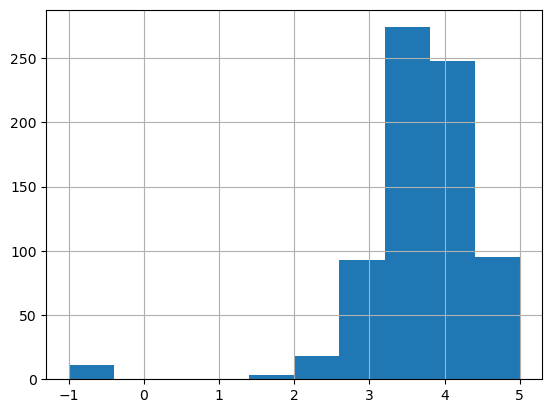

In [14]:
df.Rating.hist()

<AxesSubplot:>

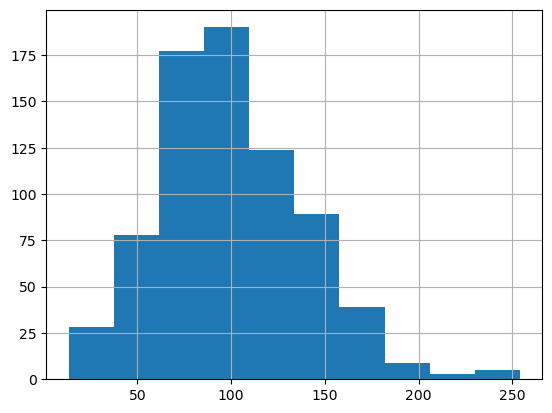

In [15]:
df['average_salary'] = df['average salary']
df.average_salary.hist()

<AxesSubplot:>

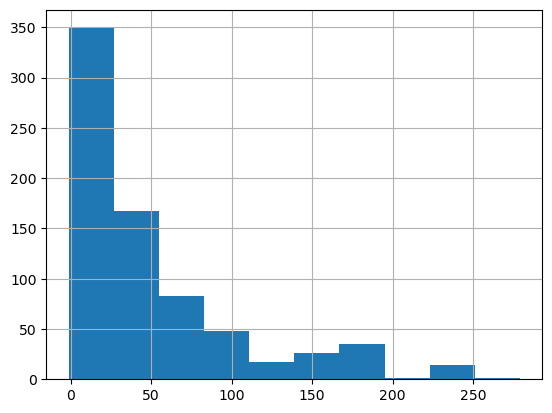

In [16]:
df.company_age.hist()

In [17]:
corr = df[['company_age', 'average_salary', 'Rating', 'desc_length', 'num_comp']].corr()

<AxesSubplot:>

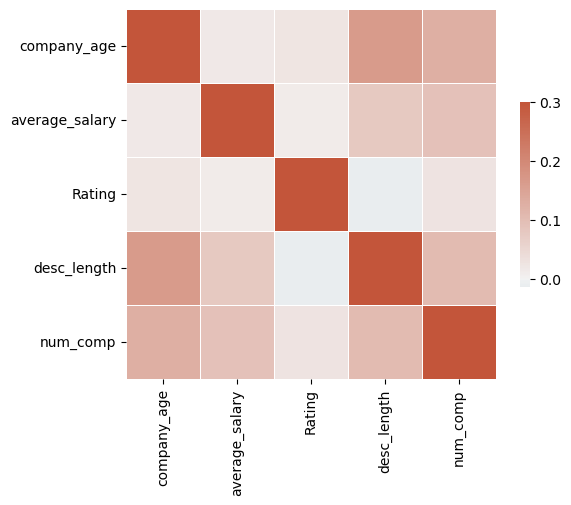

In [18]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, vmax=.3, cmap = cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average salary', 'company_text',
       'job_state', 'same_state', 'company_age', 'python', 'r_studio', 'spark',
       'aws', 'excel', 'job_simplifier', 'seniority', 'desc_length',
       'num_comp', 'annual_wage', 'average_salary'],
      dtype='object')

In [23]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership','Industry', 'Sector', 'Revenue', 'company_text','job_state', 'same_state', 'company_age', 'python', 'r_studio', 'spark',
       'aws', 'excel', 'job_simplifier', 'seniority']]

graph for Location: total = 200


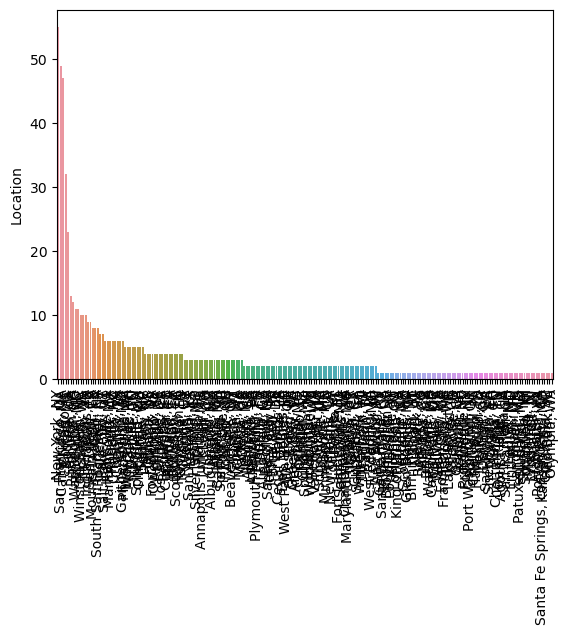

graph for Headquarters: total = 198


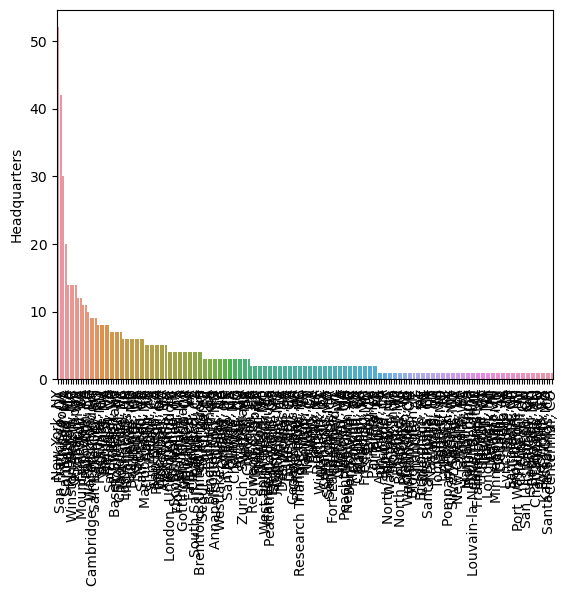

graph for Size: total = 9


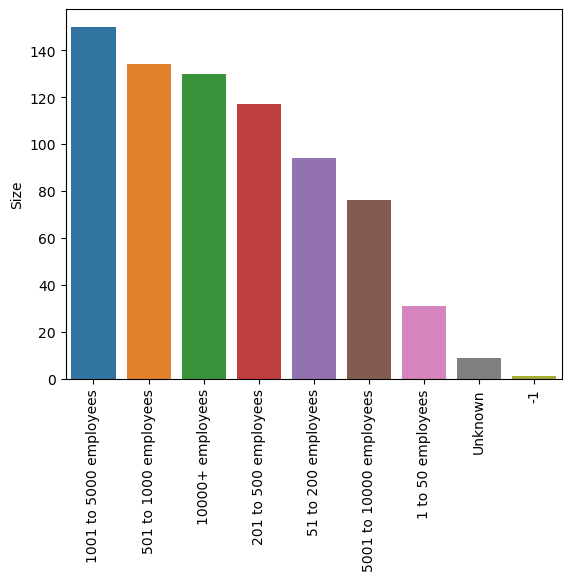

graph for Type of ownership: total = 11


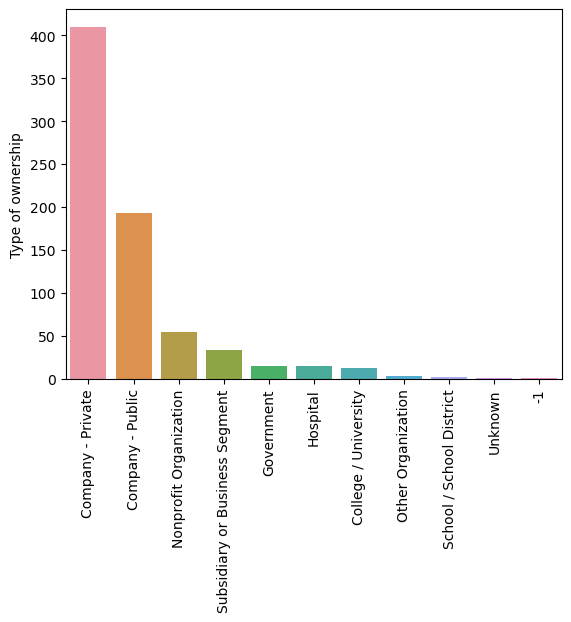

graph for Industry: total = 60


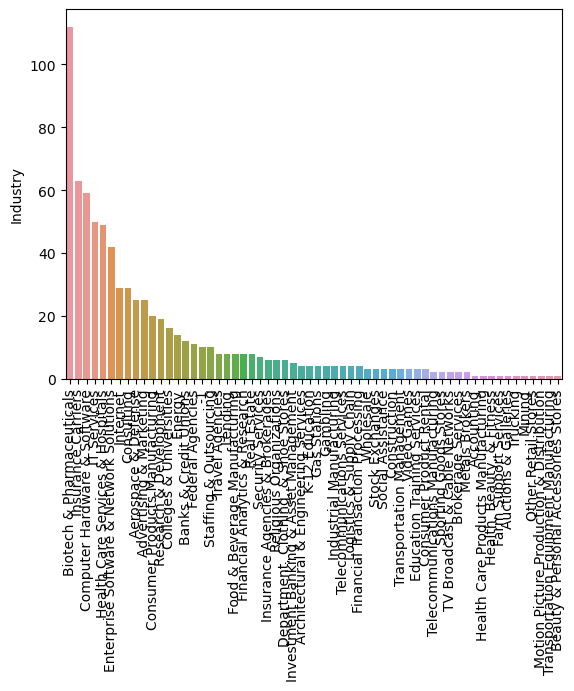

graph for Sector: total = 25


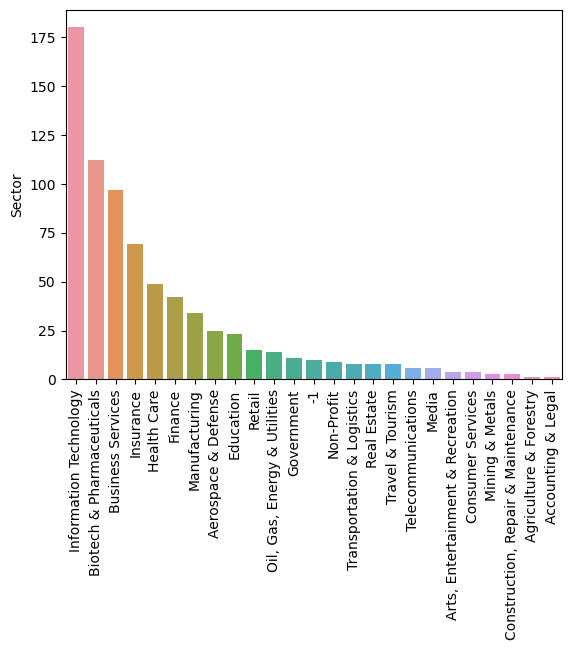

graph for Revenue: total = 14


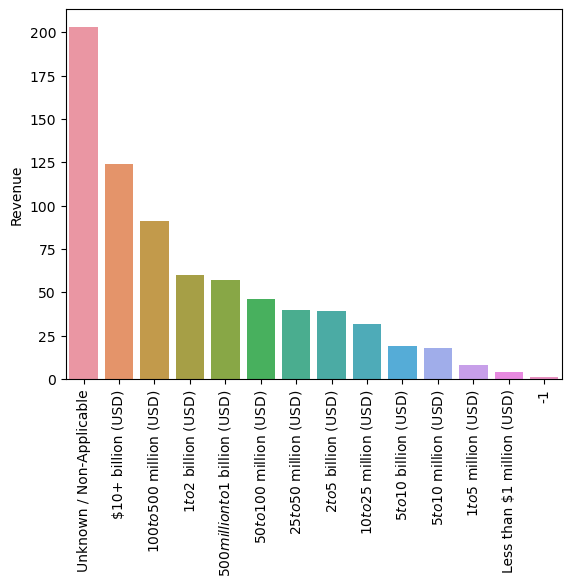

graph for company_text: total = 343


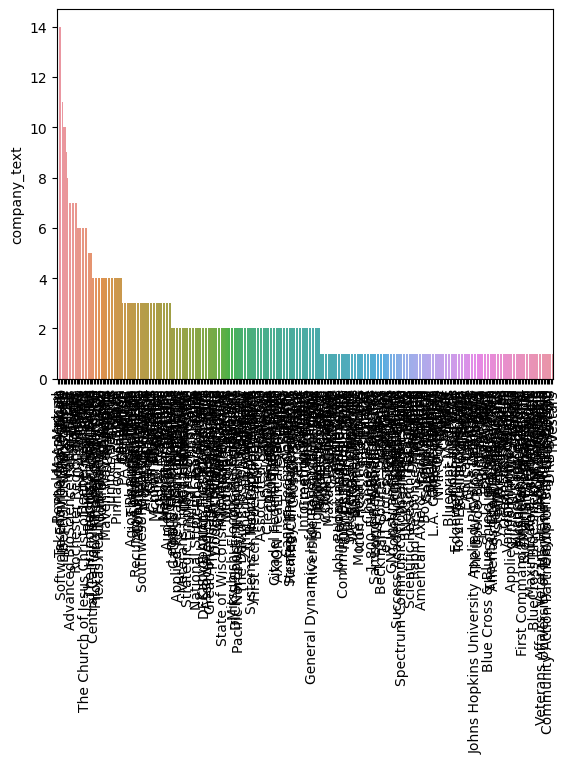

graph for job_state: total = 37


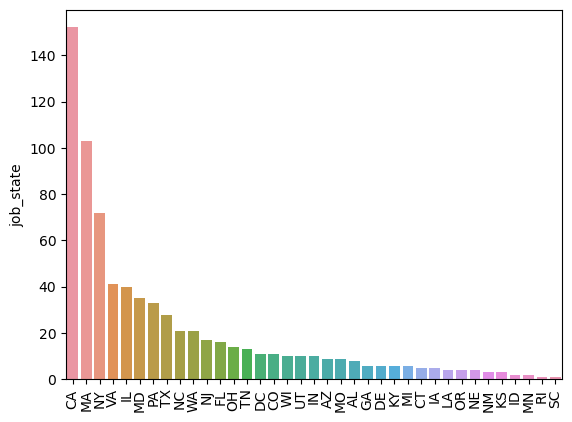

graph for same_state: total = 2


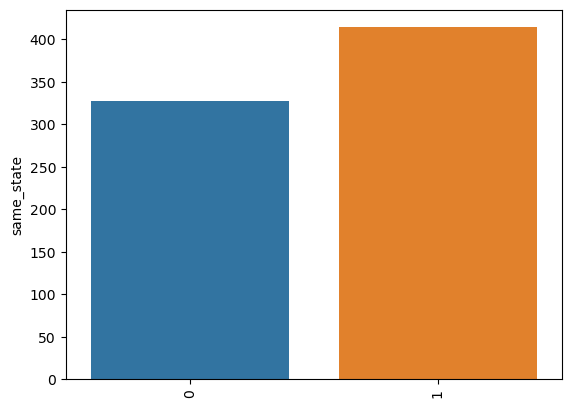

graph for company_age: total = 102


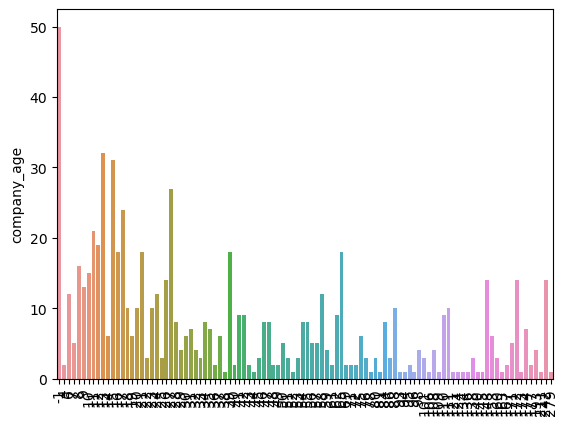

graph for python: total = 2


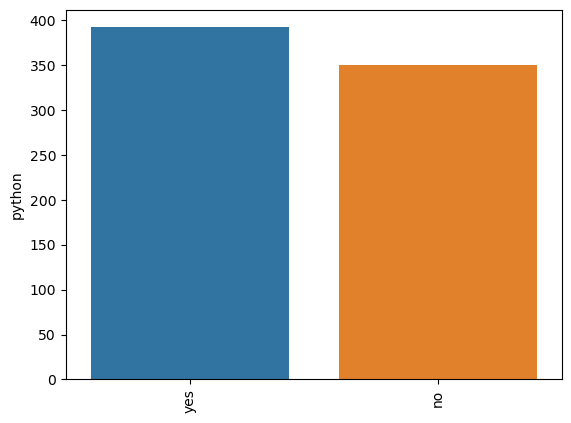

graph for r_studio: total = 2


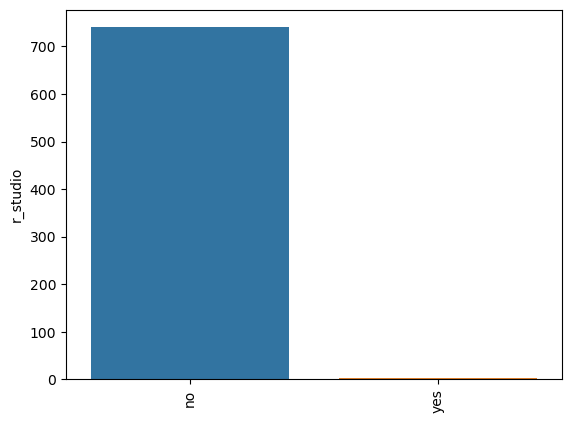

graph for spark: total = 2


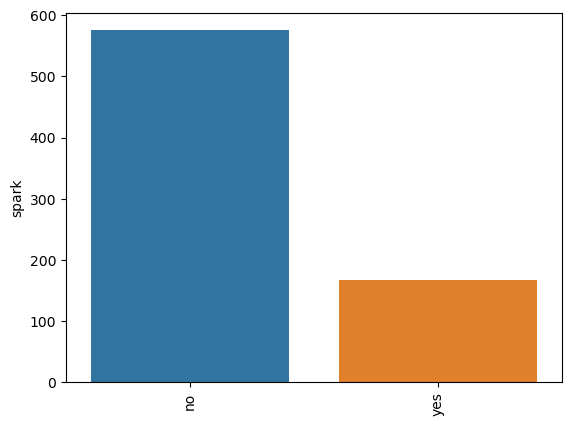

graph for aws: total = 2


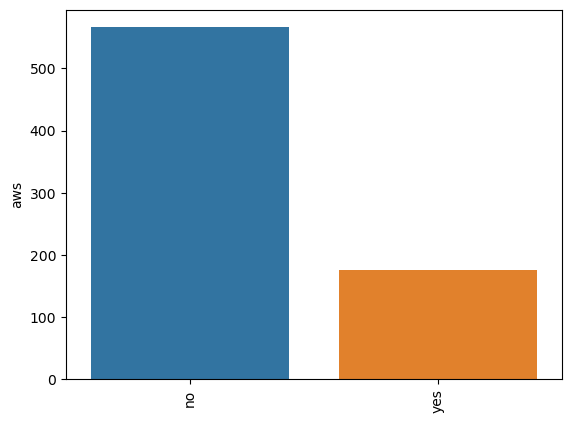

graph for excel: total = 2


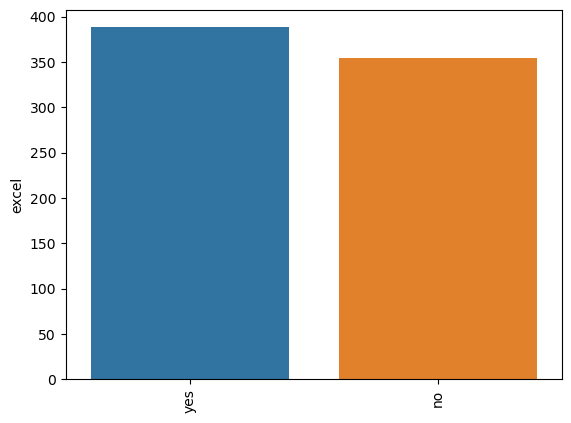

graph for job_simplifier: total = 7


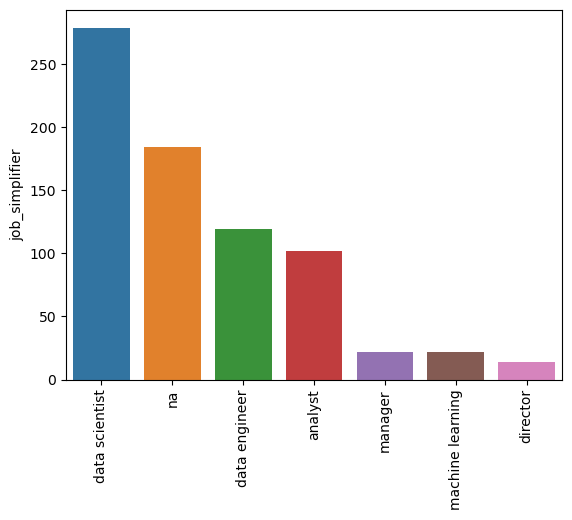

graph for seniority: total = 3


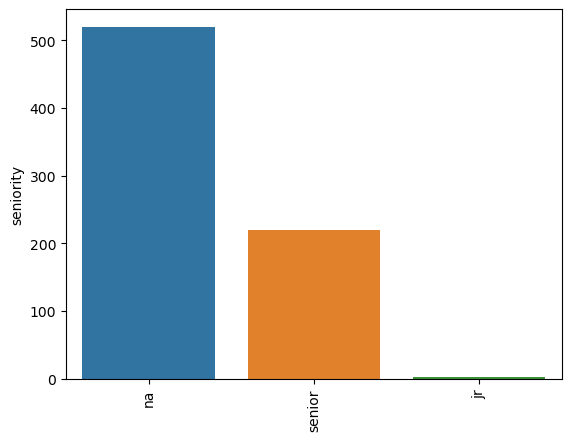

In [24]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()
    

In [25]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average salary', 'company_text',
       'job_state', 'same_state', 'company_age', 'python', 'r_studio', 'spark',
       'aws', 'excel', 'job_simplifier', 'seniority', 'desc_length',
       'num_comp', 'annual_wage', 'average_salary'],
      dtype='object')

In [26]:
pd.pivot_table(df, index = 'job_simplifier', values = 'average_salary')

,average_salary
job_simplifier,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
machine learning,126.431818
manager,84.022727
na,84.853261


In [27]:
pd.pivot_table(df, index = ['job_simplifier', 'seniority'], values = 'average_salary')

average_salary
job_simplifier   seniority                
analyst          jr              56.500000
                 na              61.155405
                 senior          79.092593
data engineer    na              96.701220
                 senior         124.689189
data scientist   jr             106.500000
                 na             107.043011
                 senior         138.956522
director         na             168.607143
machine learning na             119.133333
                 senior         142.071429
manager          na              84.022727
na               na              73.988189
                 senior         109.061404

In [28]:
pd.pivot_table(df, index = ['job_state'], values = 'average_salary').sort_values('average_salary', ascending = False)

,average_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [29]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average salary', 'company_text',
       'job_state', 'same_state', 'company_age', 'python', 'r_studio', 'spark',
       'aws', 'excel', 'job_simplifier', 'seniority', 'desc_length',
       'num_comp', 'annual_wage', 'average_salary'],
      dtype='object')

In [30]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'python', 'r_studio', 'spark', 'aws', 'excel', 'desc_length', 'average_salary']]


#rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_length 

In [31]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'average_salary').sort_values('average_salary'))

Rating
        average_salary
Rating                
 2.4         60.214286
 4.8         80.277778
 2.9         81.138889
 2.3         81.500000
 2.7         83.250000
 2.8         83.928571
 3.6         85.467391
 3.0         85.588235
 3.1         86.580000
 1.9         87.500000
 3.4         93.011364
 2.1         95.900000
 3.8         96.811475
 4.6         97.250000
 2.2         97.750000
 4.2        100.442308
 3.3        101.858974
 4.3        102.468750
 4.7        103.983871
 3.7        104.131148
 3.5        104.897959
 4.0        105.340426
 3.2        105.500000
 4.4        108.606061
 2.6        109.083333
 3.9        113.071429
 4.1        116.368421
 4.5        117.714286
 2.5        120.000000
 5.0        134.700000
-1.0        136.181818
Industry
                                          average_salary
Industry                                                
Construction                                   26.500000
Telecommunications Manufacturing               44.0000

ValueError: Grouper for 'average_salary' not 1-dimensional

In [32]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python', values = 'average_salary', aggfunc = 'count')

python,no,yes
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [33]:
df_out.to_csv('eda_data.csv',index = False) 

NameError: name 'df_out' is not defined